### 날씨 API 가져와서 선그래프 그리기

##### 날씨 API 가져오기

In [1]:
import os
import sys
import urllib.request # 웹 요청을 전송하고 응답을 수신하는 모듈 (브라우저 역할)

# 서버로 전송하는 데이터
api_key = "YgC6RL7Xuzrbvz7msHuvRG0JZ%2BJxR0E6iUI4qrJNk78%2B5FdBneHQ8wktN9kjkpfJFCUeVtCuvThmYWikuonEuA%3D%3D"

# get 방식 전송 데이터 구성
url = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?ServiceKey={0}&pageNo=1&numOfRows=50&dataCd=ASOS&dateCd=DAY&startDt=20240921&endDt=20241021&stnIds=108&dataType=JSON".format(api_key)
request = urllib.request.Request(url)

response = urllib.request.urlopen(request) # 요청 보내기 + 응답 수신

rescode = response.getcode() # 응답코드 읽기
if(rescode==200): # 정상 응답이라면
    response_body = response.read() # 응답 데이터 읽기
    print(response_body.decode('utf-8')) # binary 데이터를 text 데이터로 변환 여기서는 utf-8
else:
     print("Error Code:" + rescode)

print(type(response_body))

{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"stnId":"108","stnNm":"서울","tm":"2024-09-21","avgTa":"19.3","minTa":"17.1","minTaHrmt":"0749","maxTa":"21.9","maxTaHrmt":"1528","mi10MaxRn":"4.9","mi10MaxRnHrmt":"613","hr1MaxRn":"10.4","hr1MaxRnHrmt":"745","sumRnDur":"8.83","sumRn":"27.0","maxInsWs":"12.2","maxInsWsWd":"50","maxInsWsHrmt":"0747","maxWs":"7.0","maxWsWd":"50","maxWsHrmt":"0254","avgWs":"4.3","hr24SumRws":"3734","maxWd":"50","avgTd":"16.0","minRhm":"69","minRhmHrmt":"1741","avgRhm":"82.3","avgPv":"18.2","avgPa":"997.4","maxPs":"1008.9","maxPsHrmt":"2245","minPs":"1006.2","minPsHrmt":"1520","avgPs":"1007.3","ssDur":"12.2","sumSsHr":"0.0","hr1MaxIcsrHrmt":"1200","hr1MaxIcsr":"1.57","sumGsr":"6.31","ddMefs":"","ddMefsHrmt":"","ddMes":"","ddMesHrmt":"","sumDpthFhsc":"","avgTca":"8.5","avgLmac":"7.3","avgTs":"20.1","minTg":"15.9","avgCm5Te":"22.1","avgCm10Te":"22.2","avgCm20Te":"23.0","avgCm30Te":"24.1","avgM05Te

In [2]:
# import requests

# api_key = 'YgC6RL7Xuzrbvz7msHuvRG0JZ+JxR0E6iUI4qrJNk78+5FdBneHQ8wktN9kjkpfJFCUeVtCuvThmYWikuonEuA=='

# url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
# params ={'serviceKey' : api_key, 'dataType' : 'XML', 'dataCd' : 'ASOS', 
#          'dateCd' : 'DAY', 'startDt' : '20240801', 'endDt' : '20241001', 'stnIds' : '108' }

# response = requests.get(url, params=params)
# print(response.content.decode('utf-8'))

In [3]:
type(response)

http.client.HTTPResponse

##### json -> dict 변환

In [4]:
import json
text_response = response_body.decode('utf-8')
dict_response = json.loads(text_response)
dict_response

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'stnId': '108',
      'stnNm': '서울',
      'tm': '2024-09-21',
      'avgTa': '19.3',
      'minTa': '17.1',
      'minTaHrmt': '0749',
      'maxTa': '21.9',
      'maxTaHrmt': '1528',
      'mi10MaxRn': '4.9',
      'mi10MaxRnHrmt': '613',
      'hr1MaxRn': '10.4',
      'hr1MaxRnHrmt': '745',
      'sumRnDur': '8.83',
      'sumRn': '27.0',
      'maxInsWs': '12.2',
      'maxInsWsWd': '50',
      'maxInsWsHrmt': '0747',
      'maxWs': '7.0',
      'maxWsWd': '50',
      'maxWsHrmt': '0254',
      'avgWs': '4.3',
      'hr24SumRws': '3734',
      'maxWd': '50',
      'avgTd': '16.0',
      'minRhm': '69',
      'minRhmHrmt': '1741',
      'avgRhm': '82.3',
      'avgPv': '18.2',
      'avgPa': '997.4',
      'maxPs': '1008.9',
      'maxPsHrmt': '2245',
      'minPs': '1006.2',
      'minPsHrmt': '1520',
      'avgPs': '1007.3',
      'ssDur': '12.2',
  

##### dict에서 list 찾기

In [5]:
dict_response.keys()
print('dict_response의 타입:', type(dict_response["response"]) )
print('response 키:', dict_response["response"].keys())
print('body 키:', dict_response["response"]["body"].keys())
print('items 키:', dict_response["response"]["body"]["items"].keys())
print('item 키:', dict_response["response"]["body"]["items"]["item"][0].keys()) # 마침내 리스트

dict_response의 타입: <class 'dict'>
response 키: dict_keys(['header', 'body'])
body 키: dict_keys(['dataType', 'items', 'pageNo', 'numOfRows', 'totalCount'])
items 키: dict_keys(['item'])
item 키: dict_keys(['stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn', 'iscs', 'sumFogDur'])


In [6]:
print(dict_response.keys())

dict_keys(['response'])


##### 원하는 자료 출력

In [7]:
dict_response['response']
print( type( dict_response['response'] ) )

# print( dict_response['response'][0].keys() ) # 리스트니까 반복문
for item in dict_response["response"]["body"]["items"]["item"]:
    print("최고 기온", item['maxTa'])

for item in dict_response["response"]["body"]["items"]["item"]:
    print("최저 기온", item['minTa'])

for item in dict_response["response"]["body"]["items"]["item"]:
    print("평균 기온", item['avgTa'])




<class 'dict'>
최고 기온 21.9
최고 기온 26.7
최고 기온 26.1
최고 기온 26.9
최고 기온 27.3
최고 기온 28.0
최고 기온 28.0
최고 기온 27.9
최고 기온 29.0
최고 기온 28.5
최고 기온 21.7
최고 기온 19.9
최고 기온 22.5
최고 기온 24.2
최고 기온 24.4
최고 기온 17.9
최고 기온 20.7
최고 기온 23.9
최고 기온 24.4
최고 기온 24.1
최고 기온 24.4
최고 기온 24.7
최고 기온 22.6
최고 기온 21.5
최고 기온 21.9
최고 기온 24.2
최고 기온 25.7
최고 기온 18.8
최고 기온 21.1
최고 기온 17.8
최고 기온 19.3
최저 기온 17.1
최저 기온 16.9
최저 기온 16.6
최저 기온 15.6
최저 기온 18.6
최저 기온 21.1
최저 기온 19.1
최저 기온 19.2
최저 기온 19.1
최저 기온 18.3
최저 기온 13.3
최저 기온 11.6
최저 기온 10.8
최저 기온 11.9
최저 기온 11.6
최저 기온 12.3
최저 기온 14.0
최저 기온 12.7
최저 기온 13.9
최저 기온 15.3
최저 기온 13.9
최저 기온 13.4
최저 기온 12.6
최저 기온 17.6
최저 기온 17.6
최저 기온 14.4
최저 기온 13.8
최저 기온 16.2
최저 기온 12.4
최저 기온 10.5
최저 기온 9.7
평균 기온 19.3
평균 기온 21.0
평균 기온 20.8
평균 기온 21.0
평균 기온 23.3
평균 기온 23.6
평균 기온 22.7
평균 기온 23.2
평균 기온 23.5
평균 기온 23.0
평균 기온 18.3
평균 기온 14.9
평균 기온 16.4
평균 기온 17.6
평균 기온 17.5
평균 기온 15.4
평균 기온 16.9
평균 기온 17.7
평균 기온 18.8
평균 기온 18.8
평균 기온 18.6
평균 기온 18.3
평균 기온 18.3
평균 기온 19.3
평균 기온 19.2
평균 기온 18.2
평균 기온 19.0
평균 기온 1

##### 데이터 프레임 변환

In [8]:
import pandas as pd
from datetime import datetime

df = pd.DataFrame(dict_response["response"]["body"]["items"]["item"])

df.head()
df_loc = df.loc[:,['tm', 'stnNm', 'maxTa', 'minTa', 'avgTa']]
df_loc.columns = ['Date', 'Area', 'Max', 'Min', 'Avg']

# datetime_string = "2024-09-01"
# datetime_format = "%Y-%m-%d"
# datetime_result = datetime.strptime(datetime_string, datetime_format)
# print(type(datetime_result))

df_loc["Max"] = df_loc['Max'].map(lambda v : float(v))
df_loc["Min"] = df_loc['Min'].map(lambda v : float(v))
df_loc["Avg"] = df_loc['Avg'].map(lambda v : float(v))
print( df_loc )

          Date Area   Max   Min   Avg
0   2024-09-21   서울  21.9  17.1  19.3
1   2024-09-22   서울  26.7  16.9  21.0
2   2024-09-23   서울  26.1  16.6  20.8
3   2024-09-24   서울  26.9  15.6  21.0
4   2024-09-25   서울  27.3  18.6  23.3
5   2024-09-26   서울  28.0  21.1  23.6
6   2024-09-27   서울  28.0  19.1  22.7
7   2024-09-28   서울  27.9  19.2  23.2
8   2024-09-29   서울  29.0  19.1  23.5
9   2024-09-30   서울  28.5  18.3  23.0
10  2024-10-01   서울  21.7  13.3  18.3
11  2024-10-02   서울  19.9  11.6  14.9
12  2024-10-03   서울  22.5  10.8  16.4
13  2024-10-04   서울  24.2  11.9  17.6
14  2024-10-05   서울  24.4  11.6  17.5
15  2024-10-06   서울  17.9  12.3  15.4
16  2024-10-07   서울  20.7  14.0  16.9
17  2024-10-08   서울  23.9  12.7  17.7
18  2024-10-09   서울  24.4  13.9  18.8
19  2024-10-10   서울  24.1  15.3  18.8
20  2024-10-11   서울  24.4  13.9  18.6
21  2024-10-12   서울  24.7  13.4  18.3
22  2024-10-13   서울  22.6  12.6  18.3
23  2024-10-14   서울  21.5  17.6  19.3
24  2024-10-15   서울  21.9  17.6  19.2
25  2024-10-

In [10]:
df_loc['Date'] = pd.to_datetime(df_loc['Date'])
df_loc.info()
df_loc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    31 non-null     datetime64[ns]
 1   Area    31 non-null     object        
 2   Max     31 non-null     float64       
 3   Min     31 non-null     float64       
 4   Avg     31 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.3+ KB


,Date,Area,Max,Min,Avg
0,2024-09-21,서울,21.9,17.1,19.3
1,2024-09-22,서울,26.7,16.9,21.0
2,2024-09-23,서울,26.1,16.6,20.8
3,2024-09-24,서울,26.9,15.6,21.0
4,2024-09-25,서울,27.3,18.6,23.3


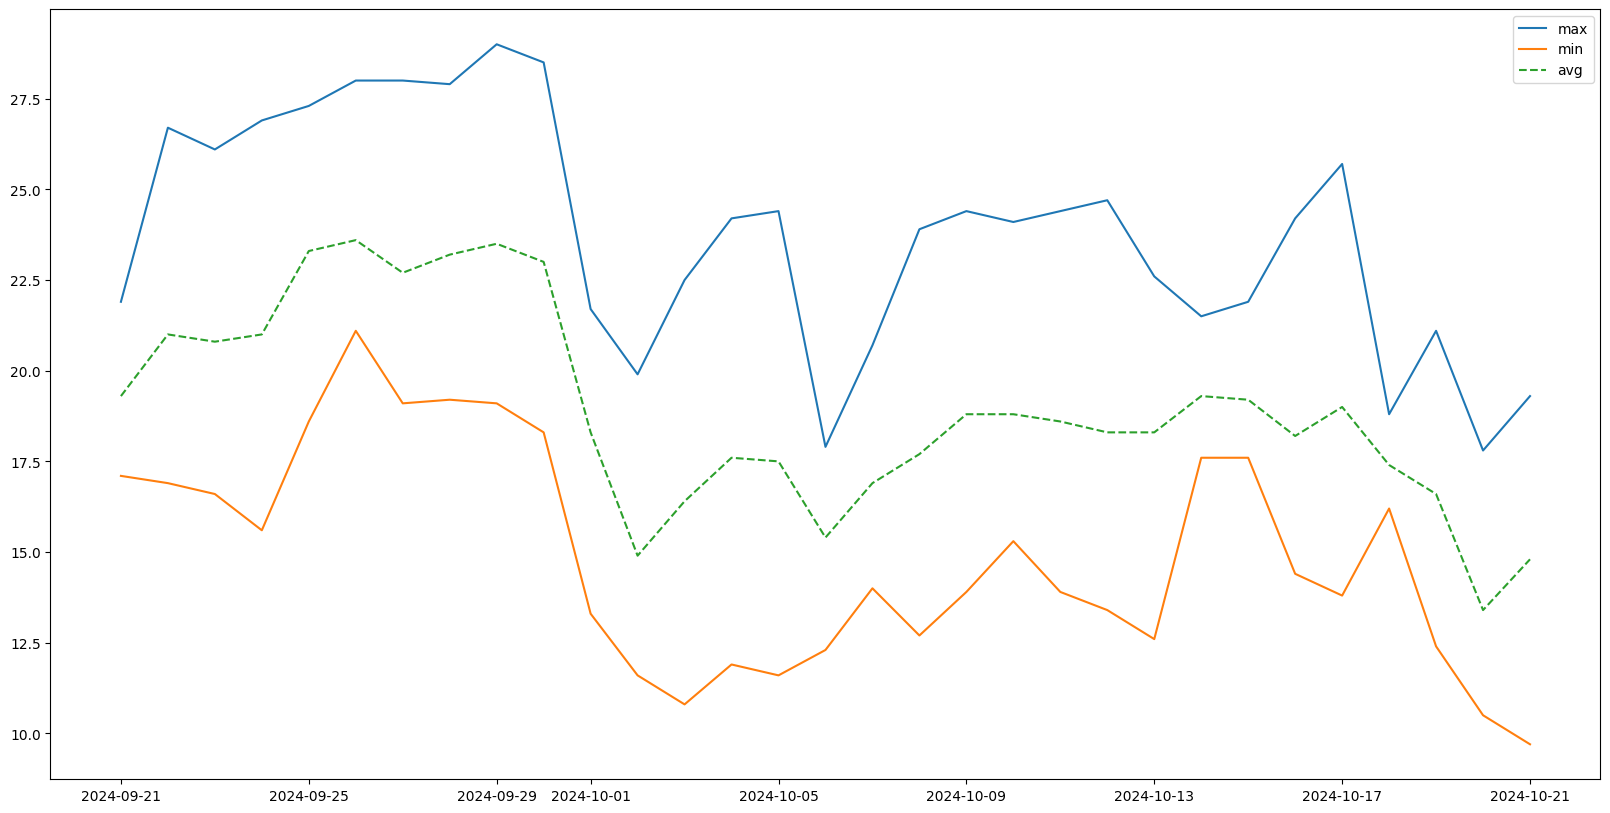

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df_loc['Date'], df_loc['Max'], label = 'max')
plt.plot(df_loc['Date'], df_loc['Min'], label = 'min')
plt.plot(df_loc['Date'], df_loc['Avg'], label = 'avg', ls = '--')
plt.legend()
plt.show()